# Lending Club Case Study

The project aims to analyze data to identify and understand the key factors (driver variables) that contribute to loan defaults (charged-off loans). By conducting exploratory data analysis (EDA), the company intends to pinpoint strong indicators of loan default, enabling better risk assessment and reduction of credit loss.


First we import important libraries:

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Now we import our dataset

In [279]:
lending_dataset = pd.read_csv("loan.csv")

Now we check the shape and infomartion about dataset

In [280]:
lending_dataset.shape

(39717, 111)

So, We came to now that the dataset has 39717 rows and 111 columns

In [281]:
#This will print Frst 10 Rows of the dataset
lending_dataset.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


From above we can see that in several column their is null value so we have to check for null values distribtion in our dataset 

In [282]:
lending_dataset.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Observation
From above,We can clearly see that some column like-"tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit",total_il_high_credit_limit"  have all values NULL so we will remove these columns first

In [283]:
lending_dataset.dropna(axis = 1, how = 'all', inplace = True)
lending_dataset.shape

(39717, 57)

Now we left with 57 columns but as per our objective we have to identify the key driver variables that contribute to loan defaults. So we have to get rid of several irrelevent columns from the dataset.

In [284]:
lending_dataset.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

After Analysing dataset we observed that some columns has single repeated value throught the dataset and some columns does not have any driving factors for loan approval so removing them all.

In [285]:
lending_dataset.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 
                      'pub_rec_bankruptcies',"id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state",
                      "desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", 
                      "total_rec_prncp","total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", 
                      "last_pymnt_amnt", "next_pymnt_d" ,"chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record",
                        'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)

lending_dataset.shape


(39717, 21)

So, Now we left with 21 columns, Let See the columns with which we are left with

In [286]:
lending_dataset.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [287]:
lending_dataset.head(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12
6,7000,7000.0,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.0,...,Dec-11,Fully Paid,debt_consolidation,23.51,Jul-05,1,7,0,85.60%,11
7,3000,3000.0,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.0,...,Dec-11,Fully Paid,car,5.35,Jan-07,2,4,0,87.50%,4
8,5600,5600.0,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.0,...,Dec-11,Charged Off,small_business,5.55,Apr-04,2,11,0,32.60%,13
9,5375,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.0,...,Dec-11,Charged Off,other,18.08,Sep-04,0,2,0,36.50%,3


After analysing dataset we see that their are some missing value exist, So now we have to handle those missing values

In [288]:
lending_dataset.isna().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

From above we can see that, columns "emp_length", "revol_util" having missing values. So we can calculate the mean,mode,median and will replace missing values with the fittest one.

### First handle "emp_length"

In [289]:

p=lending_dataset.emp_length.value_counts().mean()
r=lending_dataset.emp_length.value_counts().median()
print("mean: ",p,"median: ",r)
lending_dataset.emp_length.value_counts()  #mode

mean:  3512.909090909091 median:  3282.0


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

So from above analysis we can conclude that  employment lenght "10+ years" occurs more frequently so we can replace the value of this to the null values in the column.

In [290]:
mode=lending_dataset.emp_length.mode()[0]
lending_dataset.emp_length.fillna(mode, inplace = True)
lending_dataset.emp_length.isna().sum()

0

### Now let's handle "revol_util"

In [291]:
lending_dataset.revol_util.value_counts()  #mode

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

So from above analysis we can conclude that   "0%" occurs more frequently so we can replace value of this to the null values in the column.

In [292]:
mode=lending_dataset.revol_util.mode()[0]
lending_dataset.revol_util.fillna(mode, inplace = True)
lending_dataset.revol_util.isna().sum()

0

Their is still some anamoly in some columns for example:
"revol_util", "int_rate" has suffix '%' and "emp_length" has suffix '+ years' like which make them difficult to do analysis over it so we have standardize them by removing the suffix from them.

In [293]:
lending_dataset.revol_util = pd.to_numeric(lending_dataset['revol_util'].str.replace("%",""))
lending_dataset.int_rate= pd.to_numeric(lending_dataset['int_rate'].str.replace("%",""))

# In emp_length  (< 1 year) is assumed as 0 and 10+ years is assumed as 10 
lending_dataset.emp_length=pd.to_numeric(lending_dataset.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))


In [294]:
lending_dataset.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
4,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.9,38


### Now our objective is to handling outliers of numerical variables columns. Let's do it Sequentially.

First 'dti'


<Axes: xlabel='dti'>

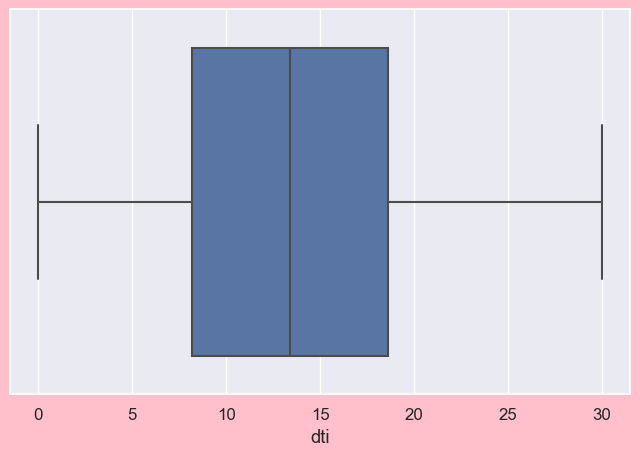

In [295]:
plt.figure(facecolor="pink",figsize=(8,5))
sns.boxplot(x=lending_dataset.dti)

'dti' columns looking good. Hence, Now we check for 'loan_amnt'

<Axes: xlabel='loan_amnt'>

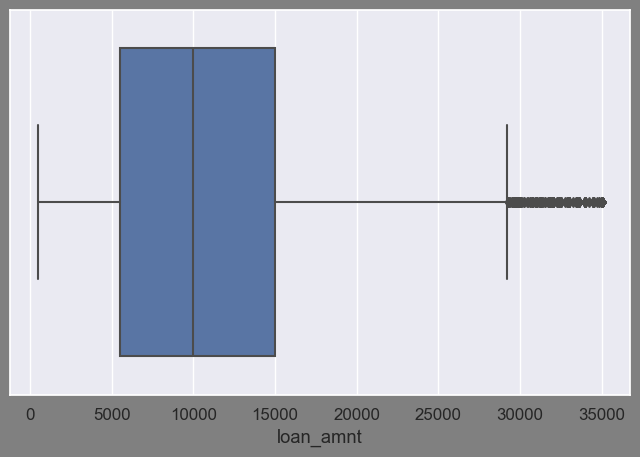

In [296]:
plt.figure(facecolor="grey",figsize=(8,5))
sns.boxplot(x=lending_dataset.loan_amnt)

From above we can see that there is outlier so we have to remove them so first calculate the quantile distribution -[10th,20th-----,100th]

In [297]:
lending_dataset.loan_amnt.quantile([0.10,0.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.10     3200.0
0.25     5500.0
0.50    10000.0
0.75    15000.0
0.90    22000.0
0.95    25000.0
0.97    30000.0
0.98    31468.0
0.99    35000.0
Name: loan_amnt, dtype: float64

## Removing outlier

<Axes: xlabel='loan_amnt'>

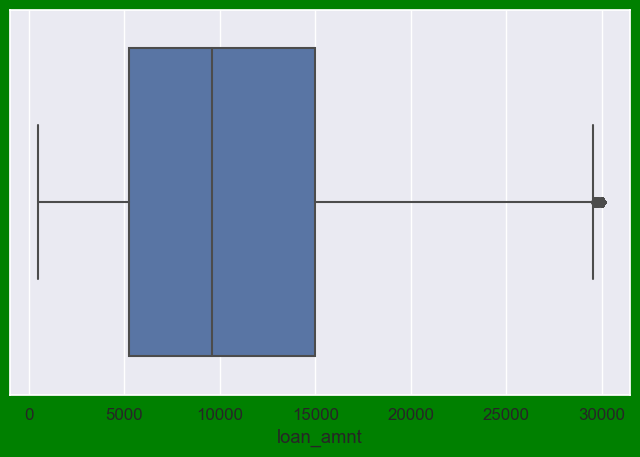

In [298]:
lending_dataset=lending_dataset[lending_dataset.loan_amnt<=30000]
plt.figure(facecolor='green',figsize=(8,5))
sns.boxplot(x=lending_dataset.loan_amnt)

### 'loan_amnt' columns looking good. Hence, Now we check for 'annual_inc'

<Axes: xlabel='annual_inc'>

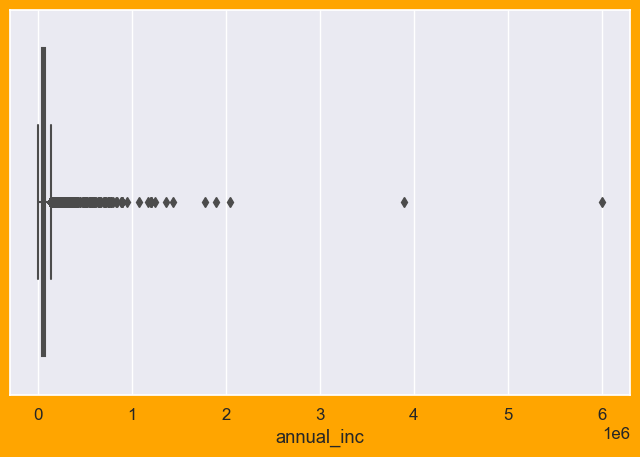

In [299]:
plt.figure(facecolor='orange',figsize=(8,5))
sns.boxplot(x=lending_dataset.annual_inc)

From above we can see that there is outlier so we have to remove them so first calculate the quantile distribution -[10th,20th-----,100th]

In [300]:
lending_dataset.annual_inc.quantile([0.10,0.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.10     30000.0
0.25     40000.0
0.50     58000.0
0.75     80004.0
0.90    113000.0
0.95    140000.0
0.97    160000.0
0.98    180000.0
0.99    225000.0
Name: annual_inc, dtype: float64

We can see that value after 90th percentile increase insignificantly so we will remove value after 90th percentile.

<Axes: xlabel='annual_inc'>

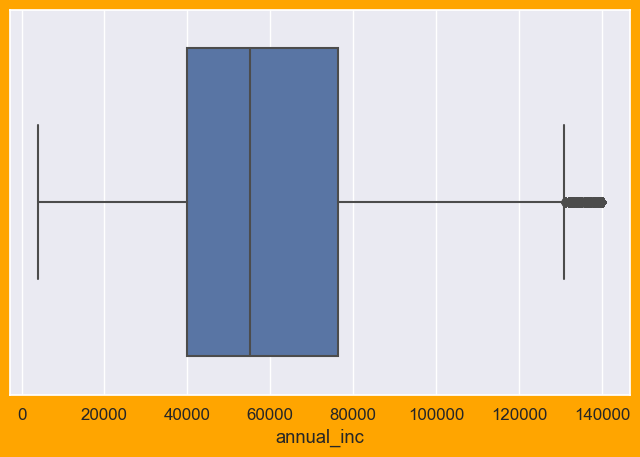

In [301]:
lending_dataset=lending_dataset[lending_dataset.annual_inc <= lending_dataset['annual_inc'].quantile(0.95)]
plt.figure(facecolor='orange',figsize=(8,5))
sns.boxplot(x=lending_dataset.annual_inc)

'annual_inc' column looking good. Hence, Now we check for 'funded_amnt_inv'

<Axes: xlabel='funded_amnt_inv'>

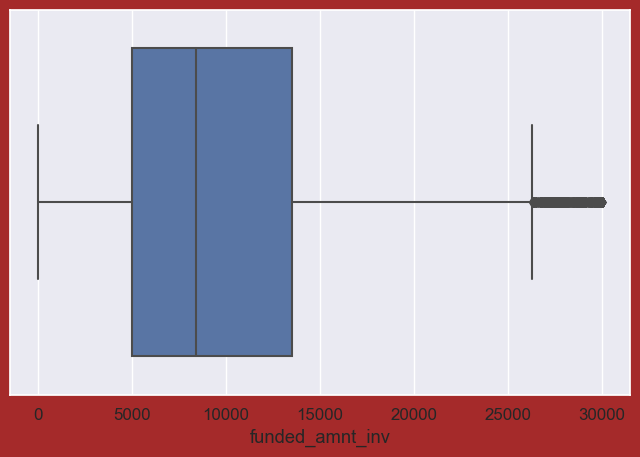

In [302]:
plt.figure(facecolor='brown',figsize=(8,5))
sns.boxplot(x=lending_dataset.funded_amnt_inv)

From above we can see that there is outlier so we have to remove them so first calculate the quantile distribution -[10th,20th-----,100th]

In [303]:
lending_dataset.funded_amnt_inv.quantile([0.10,0.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.10     2800.000000
0.25     4989.375068
0.50     8395.788216
0.75    13500.000000
0.90    19375.000000
0.95    22725.000000
0.97    24622.961517
0.98    24975.000000
0.99    27575.000000
Name: funded_amnt_inv, dtype: float64

Though there are some values far from distribution, the distribution is pretty continous so there is no need to remove outliers.

# Categorical Analysis

Now we have to do univarate and Bivarete analysis


## Univarate Analysis

<Axes: xlabel='loan_status', ylabel='count'>

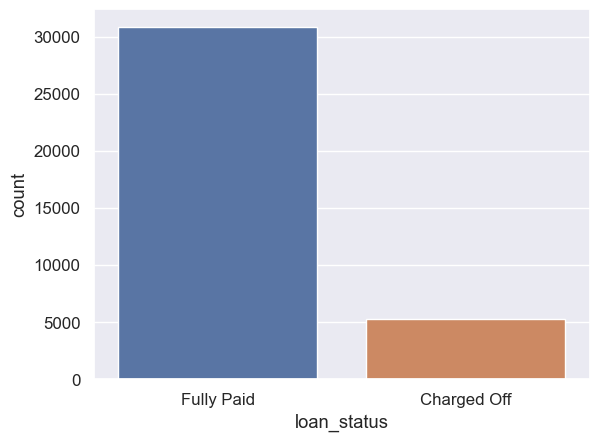

In [304]:
# We don't need value "current" its irrelvent
lending_dataset= lending_dataset[lending_dataset['loan_status'] != 'Current']
sns.countplot(x = 'loan_status', data = lending_dataset)

### Analyzing home_ownership column

In [305]:
lending_dataset['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

Eleminating 'NONE' since it's not needed 

In [306]:
#replacing 'NONE' with 'OTHERS'
lending_dataset['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
#checking unique values for home_ownership again
lending_dataset['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

We have to analyze it for only 'charged off'

<Axes: xlabel='count', ylabel='home_ownership'>

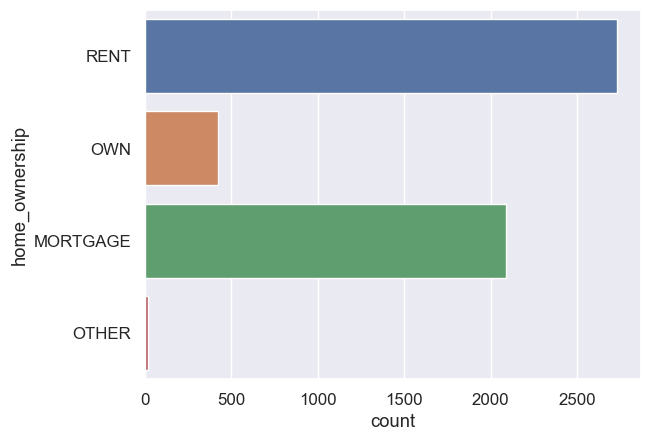

In [307]:
sns.countplot(y='home_ownership', data=lending_dataset[lending_dataset['loan_status']=='Charged Off'])

## Observation
So from above we can conclude that  who are living in RENT defaulted most

### Analyzing "Purpose" column

<Axes: xlabel='count', ylabel='purpose'>

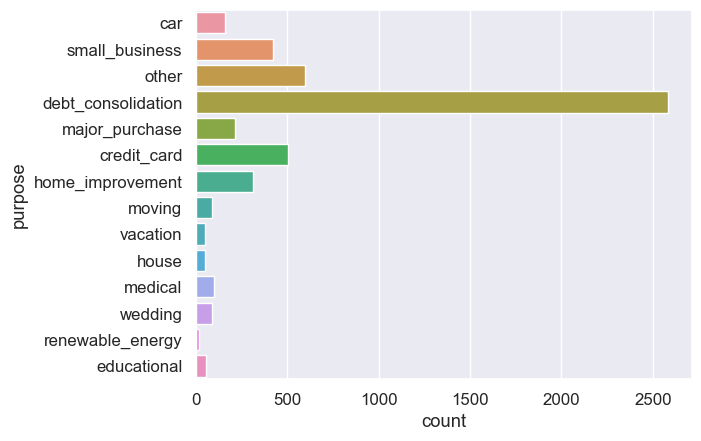

In [308]:
sns.countplot(y ='purpose', data=lending_dataset[lending_dataset.loan_status == 'Charged Off'])

## Observation:
So from above we can conclude that  for those whose purpose were 'debt_consolidation' defaulted most.

## Bivarate Analysis

### Purpose vs annual income


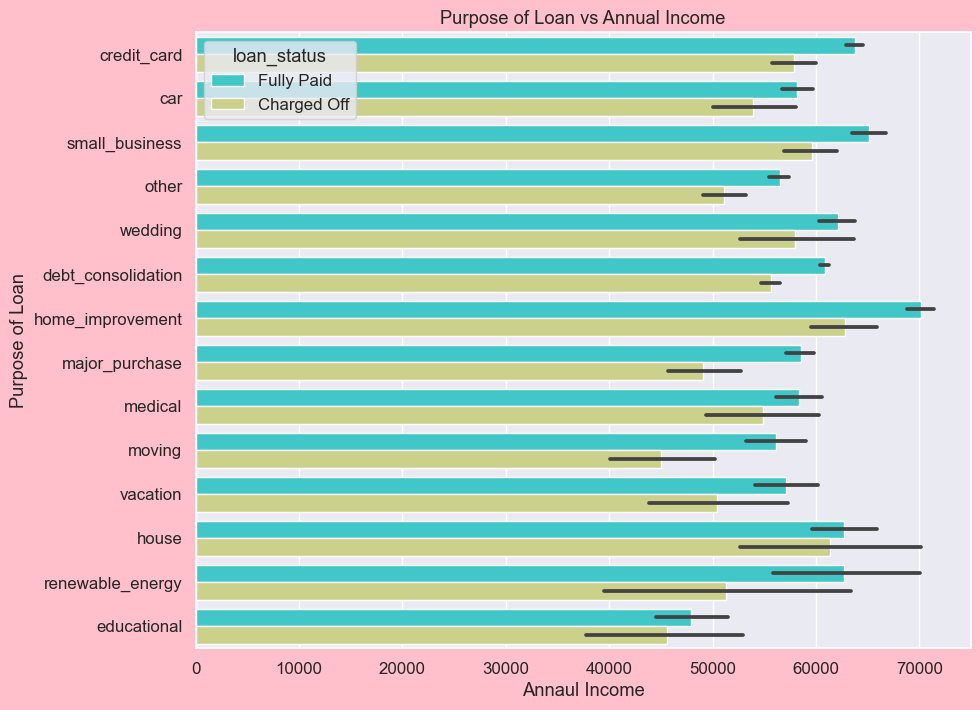

In [309]:
plt.figure(figsize=(10,8),facecolor='pink')

ax = sns.barplot(y='purpose', x='annual_inc', data =lending_dataset,palette='rainbow', hue ='loan_status')
ax.set_title('Purpose of Loan vs Annual Income')
ax.set_ylabel('Purpose of Loan')
ax.set_xlabel('Annaul Income')
plt.show()

## Observations:
Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

For Further analysis we have to group column variables to standardize them and make them easy to visualize.

In [310]:
# Creating bins for 'int_rate'
lending_dataset['int_rate_groups'] = pd.cut(
    lending_dataset['int_rate'],
    bins=4,
    precision=0,
    labels=['5%-10%', '10%-15%', '15%-20%', '20%-25%']
)

# Creating bins for 'open_acc'
lending_dataset['open_acc_g'] = pd.cut(
    lending_dataset['open_acc'],
    bins=5,
    precision=0,
    labels=['0-10', '10-20', '20-30', '30-40', '40-50']
)

# Creating bins for 'revol_util'
lending_dataset['revol_util_g'] = pd.cut(
    lending_dataset['revol_util'],
    bins=5,
    precision=0,
    labels=['0-20', '20-40', '40-60', '60-80', '80-100']
)

# Creating bins for 'total_acc'
lending_dataset['total_acc_g'] = pd.cut(
    lending_dataset['total_acc'],
    bins=5,
    precision=0,
    labels=['0-20', '20-40', '40-60', '60-80', '80-100']
)

# Creating bins for 'annual_inc'
lending_dataset['annual_inc_g'] = pd.cut(
    lending_dataset['annual_inc'],
    bins=5,
    precision=0,
    labels=['0k-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k']
)

lending_dataset['loan_amnt_g'] = pd.cut(
    lending_dataset['loan_amnt'],
      bins=7,
      precision =0,
      labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])


Loan Amount vs Interest Rate

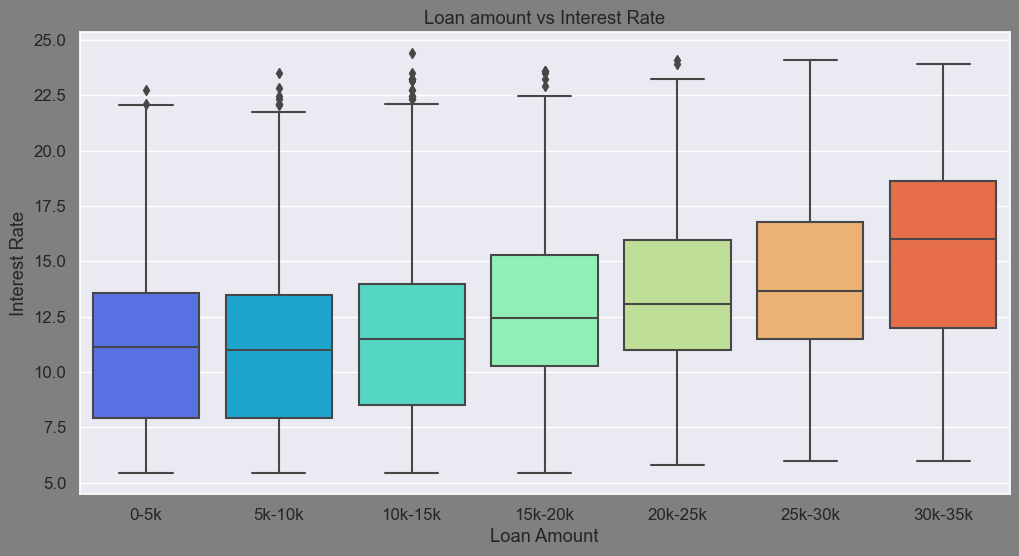

In [311]:
plt.figure(figsize=(12,6),facecolor='grey')
ax = sns.boxplot(y='int_rate', x='loan_amnt_g', data =lending_dataset,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Loan Amount')
plt.show()


## Observations:
It is clear that intrest rate is increasing with loan amount increase.
 probably when loan amount is more it is taken for longer loan term.

Grade vs Interest Rate

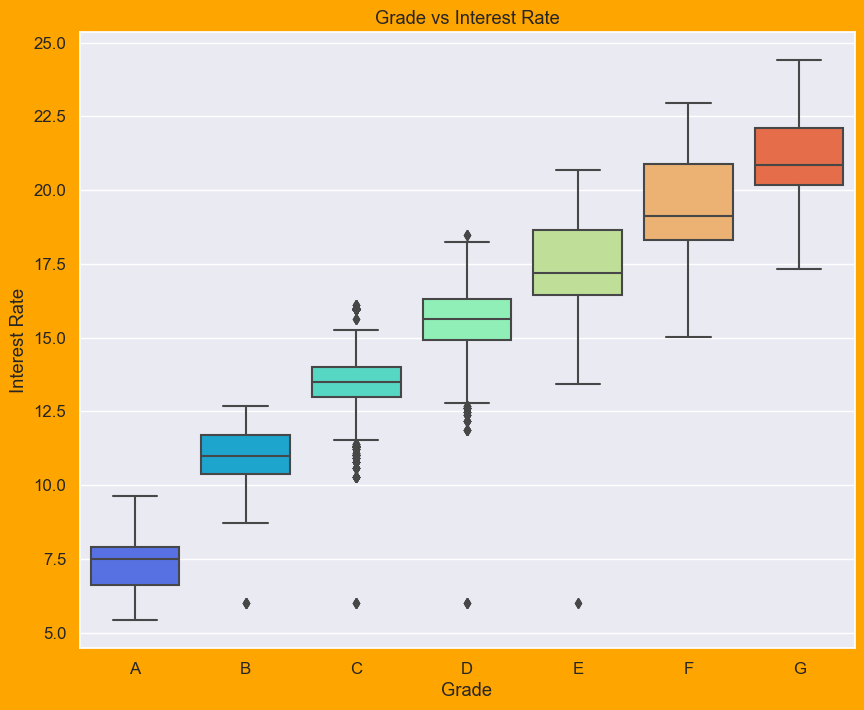

In [312]:
plt.figure(figsize=(10,8),facecolor='orange')
ax = sns.boxplot(y='int_rate', x='grade', data =lending_dataset,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Grade')
plt.show()

## Observations:
A-grade is a top letter grade for a lender to assign to a borrower.
The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
It is clear that intrest rate is increasing with grades moving from A to F.

Grade vs Annual income

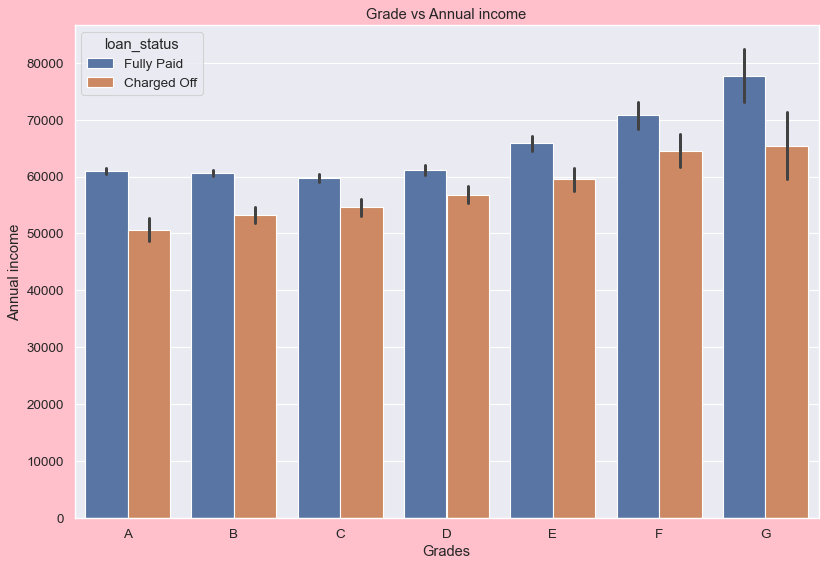

In [313]:
plt.figure(figsize=(12,8), dpi=80, facecolor='pink')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=lending_dataset, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income')
ax.set_ylabel('Annual income')
ax.set_xlabel('Grades')
plt.show()

## Observations:
From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones who'paid fully' for each and every grade (i.e. at same interest range)

Annual income vs home ownership

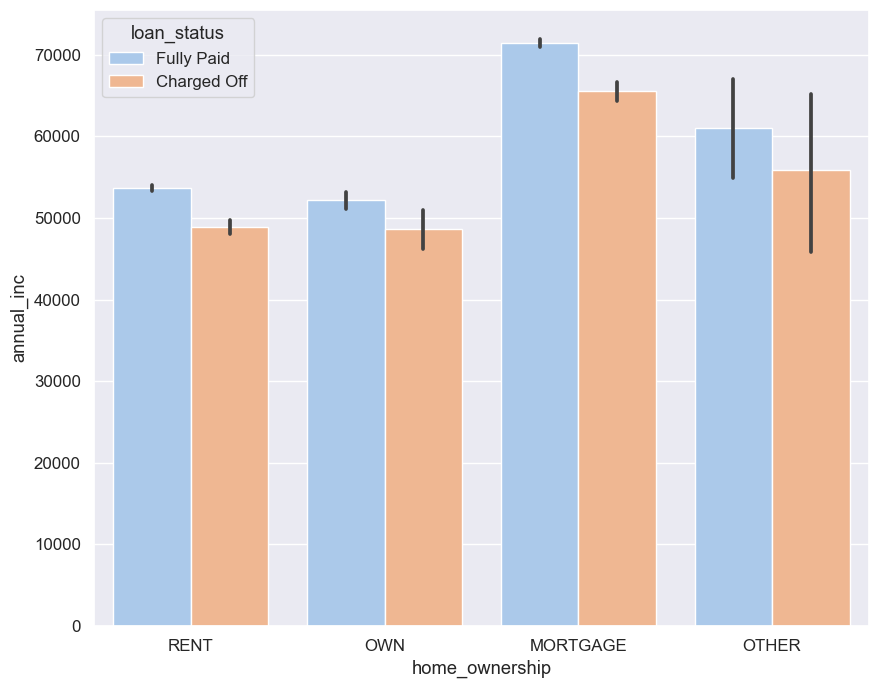

In [314]:
plt.figure(figsize=(10,8))
sns.barplot(data =lending_dataset,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

## Observation: 
people whose ownership is MORTGAGE defaulted most

### Correlation Matrix - Quantitative Variables :

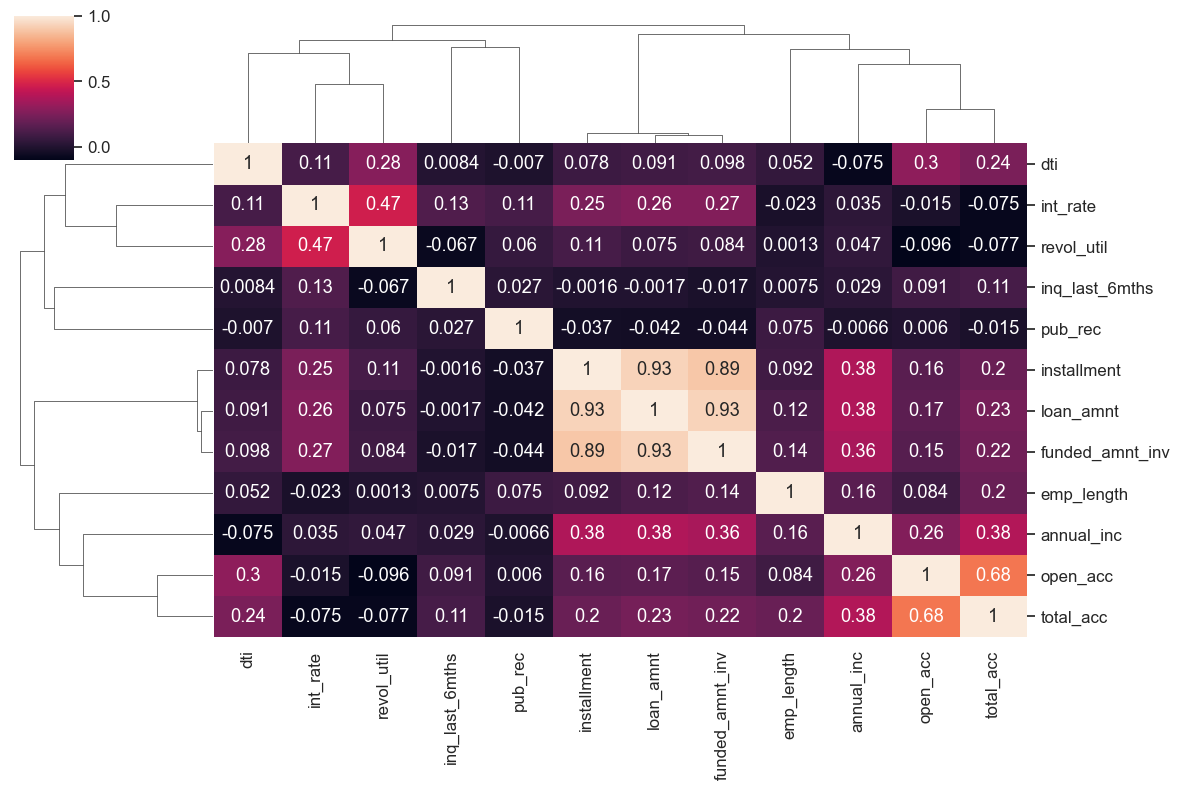

In [315]:
loan_correlation = lending_dataset.corr()
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8))
plt.show()

## Observation:
Observation is that Loan amount, investor amount, funding amount are strongly correlated.
Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
That means when annual income is low DTI is high & vice versa.
positive correlation between annual income and employment years.
That means income increases with work experience.



### Purpose vs annual income


<Axes: xlabel='issue_year', ylabel='count'>

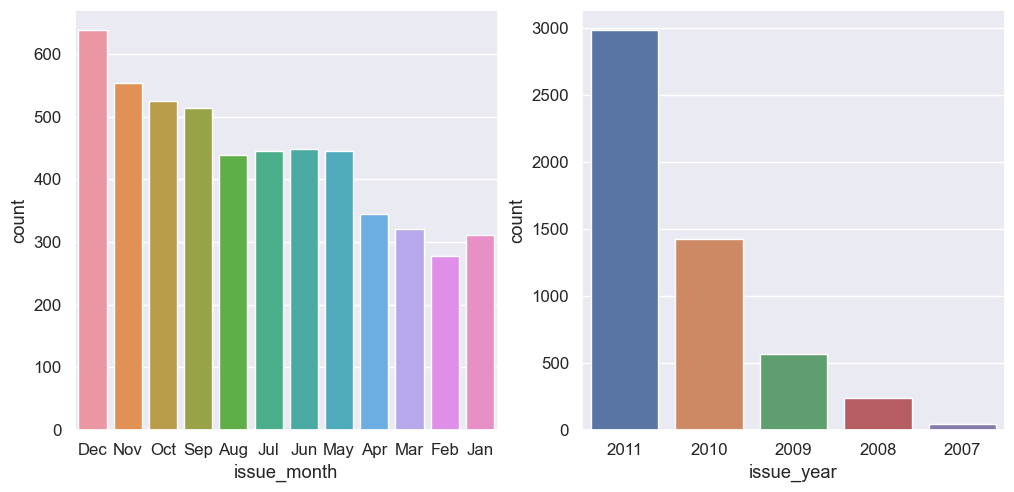

In [316]:
## Extracting month and year
month_year = lending_dataset['issue_d'].str.partition("-", True)     
lending_dataset['issue_month']=month_year[0]                       
lending_dataset['issue_year']='20' + month_year[2]

plt.figure(figsize=(12,12))
plt.subplot(221)
sns.countplot(x='issue_month', data=lending_dataset[lending_dataset['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=lending_dataset[lending_dataset['loan_status']=='Charged Off'])


## Observation
Maximum number of defaults occured when the loan was sanctioned in December. Loan issued in the year 2011 were also as compared to other years.

# Multivariate Analysis - Pair Plots

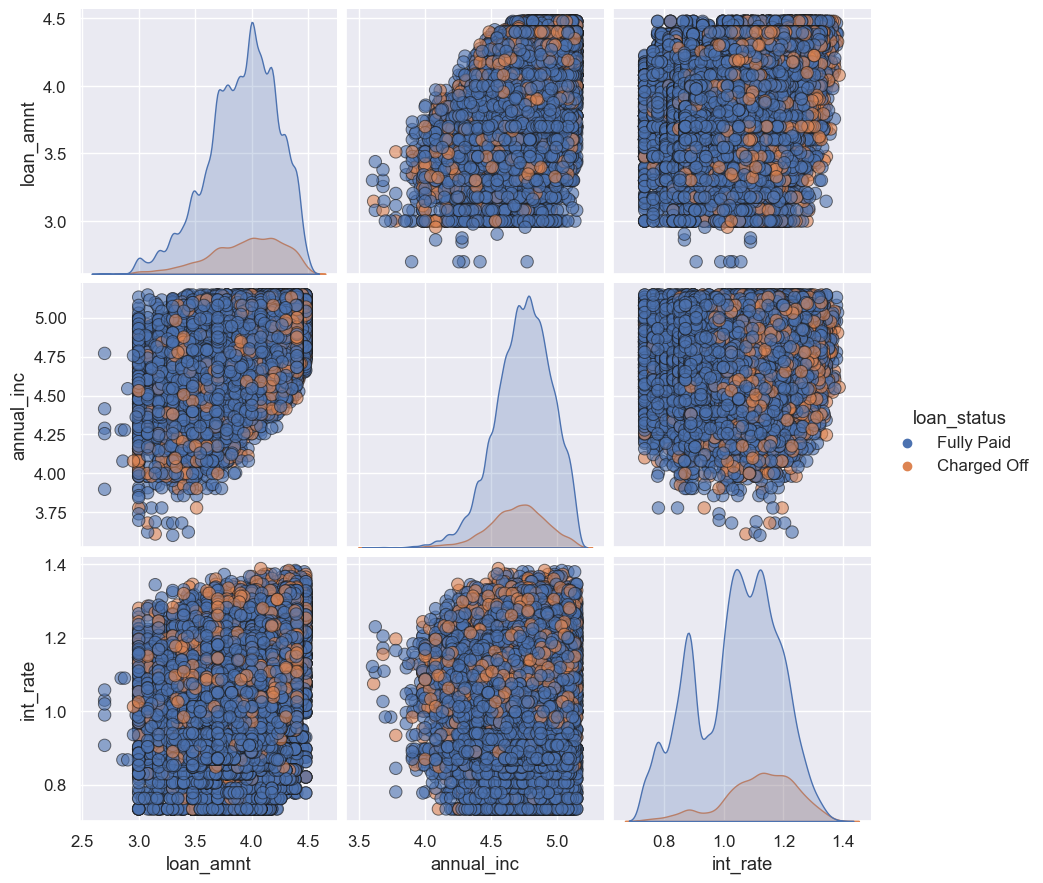

In [317]:
loan_pair = lending_dataset[['loan_amnt', 'annual_inc', 'issue_year','int_rate','loan_status']]
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

sns.pairplot(loan_pair, hue = 'loan_status',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 3)
plt.show()


# Observation:
Higher the intrest rate higher charged off ratio
Higher the annual income higher the loan amount slightly.
Increase in number of charged off with increase in year.
Intrest rate is increasing with loan amount increase

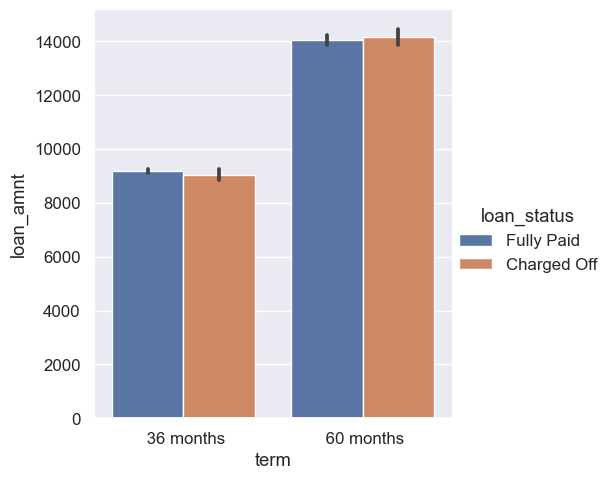

In [318]:
sns.catplot(x = 'term', y = 'loan_amnt', data = lending_dataset,hue = 'loan_status', kind = 'bar')

## Observation:
People applying for long term has applied for more loan.